In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('creditcard.csv')
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
X = data.drop(columns="Class")
y=data["Class"]

In [4]:
X.shape

(284807, 30)

In [5]:
y.shape

(284807,)

In [6]:
count_class = pd.value_counts(data["Class"],sort=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_6372\4279225078.py:1: FutureWarning: pandas.value_counts is deprecated and will be removed in a future version. Use pd.Series(obj).value_counts() instead.
  count_class = pd.value_counts(data["Class"],sort=True)


In [7]:
count_class

Class
0    284315
1       492
Name: count, dtype: int64

Text(0, 0.5, 'transaction')

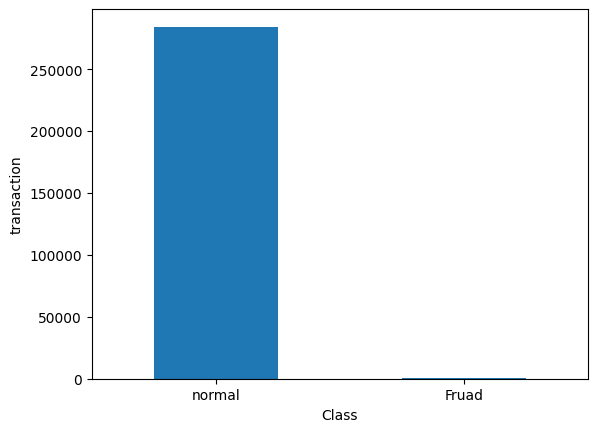

In [8]:
count_class.plot(kind = "bar",rot= 0)
LABLES=["normal","Fruad"]
plt.xticks(range(2),LABLES)
plt.xlabel("Class")
plt.ylabel("transaction")

In [9]:
noraml = data[data["Class"]==0]
fruad = data[data["Class"]==1]

In [10]:
from imblearn.under_sampling import NearMiss
from imblearn.combine import SMOTETomek

In [11]:
nm = NearMiss()
stm = SMOTETomek(random_state=42)

In [ ]:
X_res,y_res = nm.fit_resample(X,y)
X_stm,y_stm = stm.fit_resample(X,y)

In [ ]:
X_res.shape,y_res.shape

In [ ]:
X_stm.shape,y_stm.shape

In [38]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [39]:
rfc = RandomForestClassifier()

In [40]:
X_train,X_test,y_train,y_test = train_test_split(X_res,y_res,test_size=0.3,random_state=42)

In [41]:
rfc.fit(X_train,y_train)

RandomForestClassifier()

In [42]:
y_pred = rfc.predict(X_test)

In [43]:
np.mean(y_test==y_pred)

0.9662162162162162